**Part -1 : Exploratory Data Analysis**

Let's go through the columns of the datset

1. id - a unique identifier for each trip
1. vendor_id - a code indicating the provider associated with the trip record
2. pickup_datetime - date and time when the meter was engaged
3. dropoff_datetime - date and time when the meter was disengaged
4. passenger_count - the number of passengers in the vehicle (driver entered value)
5. pickup_longitude - the longitude where the meter was engaged
6. pickup_latitude - the latitude where the meter was engaged
7. dropoff_longitude - the longitude where the meter was disengaged
8. dropoff_latitude - the latitude where the meter was disengaged
9. store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
11. trip_duration - (target) duration of the trip in seconds


Loading the libraries and data

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

In [157]:
df = pd.read_csv('nyc_taxi_trip_duration.csv')

In [158]:
df.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848
5,id1918069,2,2016-02-14 18:31:42,2016-02-14 18:55:57,2,-73.993614,40.751884,-73.995422,40.723862,N,1455
6,id2429028,1,2016-04-20 20:30:14,2016-04-20 20:36:51,1,-73.965080,40.758915,-73.976807,40.764107,N,397
7,id1663798,2,2016-06-19 16:48:14,2016-06-19 17:06:35,1,-73.963890,40.765434,-73.872429,40.774200,N,1101
8,id2436943,2,2016-03-28 19:17:03,2016-03-28 19:48:29,2,-73.872887,40.774281,-73.979019,40.761879,N,1886
9,id2933909,1,2016-04-10 22:01:41,2016-04-10 22:25:30,1,-73.987823,40.740982,-73.999153,40.686451,N,1429


In [4]:
df.iloc[1,:]

id                              id0889885
vendor_id                               1
pickup_datetime       2016-03-11 23:35:37
dropoff_datetime      2016-03-11 23:53:57
passenger_count                         2
pickup_longitude               -73.988312
pickup_latitude                 40.731743
dropoff_longitude              -73.994751
dropoff_latitude                40.694931
store_and_fwd_flag                      N
trip_duration                        1100
Name: 1, dtype: object

In [5]:
print('Number of rows in dataframe: {}.'.format(df.shape[0]))
print('Number of columns in the dataframe: {}.'.format(df.shape[1]))

Number of rows in dataframe: 729322.
Number of columns in the dataframe: 11.


In [6]:
df.isnull().sum()


id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


Coverting the data into required format like:

1. Strings in pickup,dropoff to datetime format
2. Y/N --> 1/0

In [161]:
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime']=pd.to_datetime(df.dropoff_datetime)


df['store_and_fwd_flag'] = 1*(df.store_and_fwd_flag.values == 'Y')
#df.head()



In [9]:
df['time_taken'] = (df['dropoff_datetime']- df['pickup_datetime']).map(lambda x: x.total_seconds())

duration_difference = df[np.abs(df['time_taken'].values  - df['trip_duration'].values) > 1]
duration_difference.shape
#df.head()

(0, 12)

Hence there's no inconsistency in the difference wrt the drop location and trip duration

Checking trip duration

In [35]:
df['trip_duration'].min(),df['trip_duration'].max()

(1, 1939736)

In [162]:
df['trip_duration'].describe()/3600

count    202.589444
mean       0.264508
std        1.073507
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

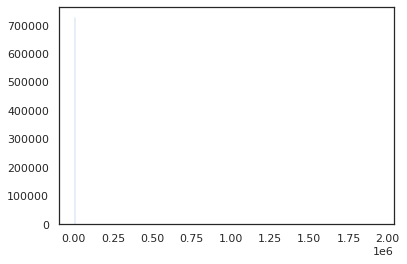

In [163]:
sns.distplot(df['trip_duration'].values, kde = False, bins = 200)

 As there are outiners, one idea is to log transform the trip duration before prediction to visualise it better.

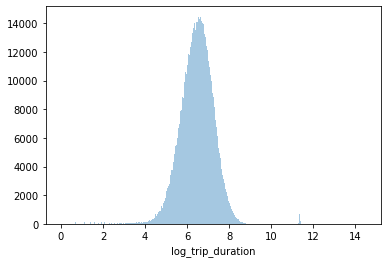

In [21]:
df['log_trip_duration'] = np.log(df['trip_duration'].values)
sns.distplot(df['log_trip_duration'], kde = False, bins = 400)
plt.show()

Observations:


1. There are several suspiciously short rides with less than 10 seconds duration.
3. There are a few huge outliers near 12

Text(0, 0.5, 'Frequency')

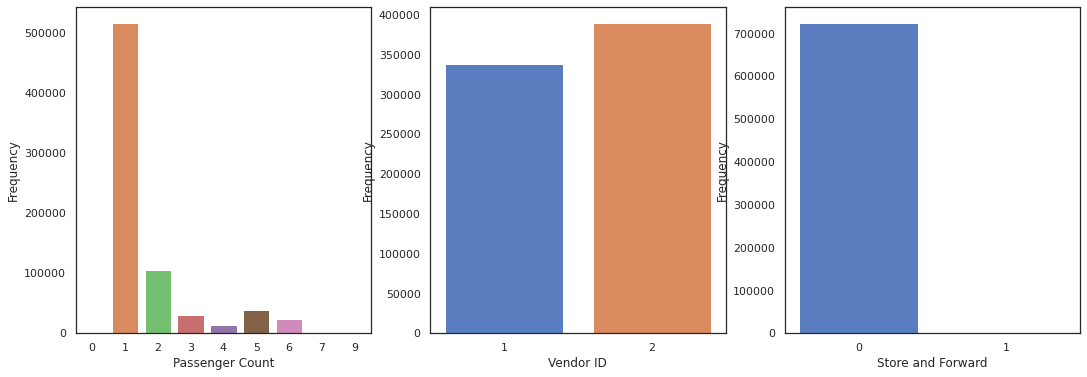

In [67]:
plt.figure(figsize = (18,6))

plt.subplot(131)
sns.countplot(df['passenger_count'])
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')

plt.subplot(132)
sns.countplot(df['vendor_id'])
plt.xlabel('Vendor ID')
plt.ylabel('Frequency')

plt.subplot(133)
sns.countplot(df['store_and_fwd_flag'])
plt.xlabel('Store and Forward')
plt.ylabel('Frequency')

Observations:

1. Most of the trips involve only 1 passenger. There are trips with 7-9 passengers but they are very low in number.
2. Vendor 2 has more number of trips as compared to vendor 1
3. The store_and_fwd_flag values, indicating whether the trip data was sent immediately to the vendor (“0”) or held in the memory of the taxi because there was no connection to the server (“1”), show that there was almost no storing taking place

Text(0, 0.5, 'Total number of pickups')

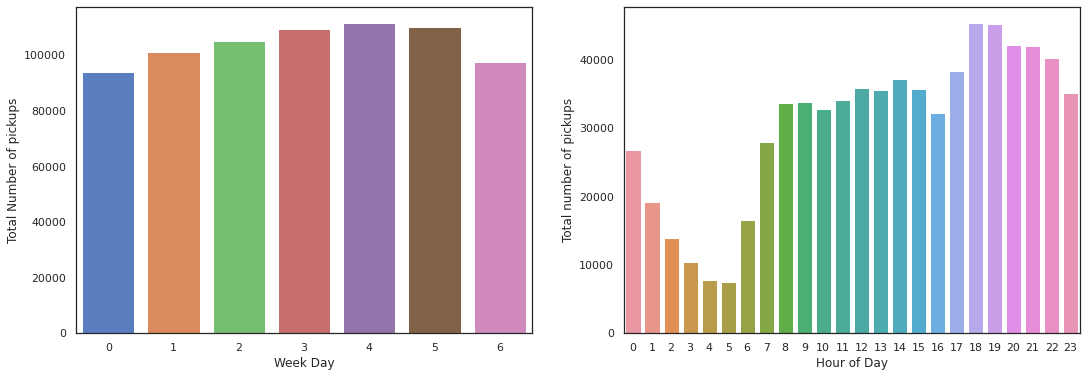

In [68]:
plt.figure(figsize=(18, 6))


plt.subplot(121)
sns.countplot(df['day_of_week'])
plt.xlabel('Week Day')
plt.ylabel('Total Number of pickups')


plt.subplot(122)
sns.countplot(df['hour_of_day'])
plt.xlabel('Hour of Day')
plt.ylabel('Total number of pickups')

Observations:
1. Number of pickups for weekends is much lower than week days with a peak on Thursday (4). Note that here weekday is a decimal number, where 0 is Sunday and 6 is Saturday.
2. Number of pickups as expected is highest in late evenings. However, it is much lower during the morning peak hours

In [32]:
df['pickup_datetime'].min(),df['pickup_datetime'].max()

(Timestamp('2016-01-01 00:01:14'), Timestamp('2016-06-30 23:59:37'))

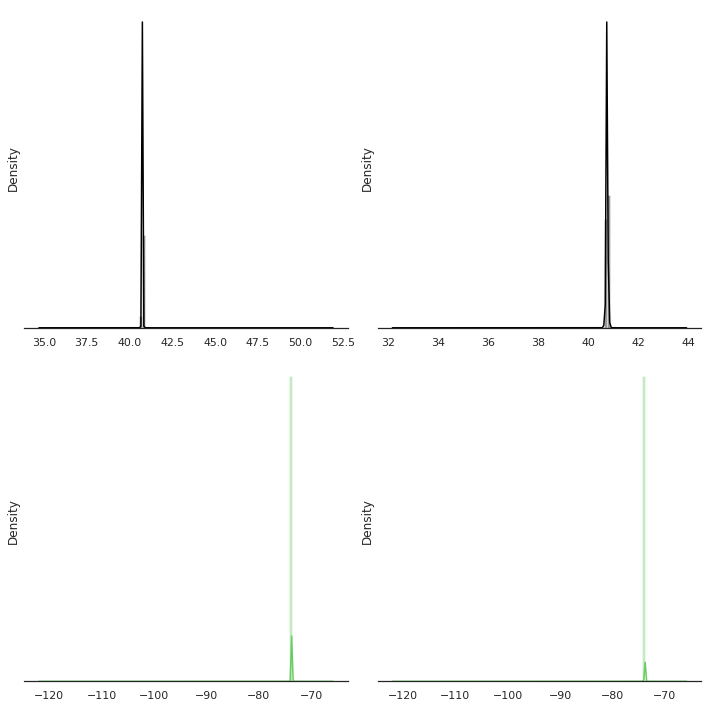

In [122]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(df['pickup_latitude'].values, label = 'pickup_latitude',color="black",bins = 100, ax=axes[0,0])
sns.distplot(df['pickup_longitude'].values, label = 'pickup_longitude',color="g",bins =100, ax=axes[1,0])
sns.distplot(df['dropoff_latitude'].values, label = 'dropoff_latitude',color="black",bins =100, ax=axes[0,1])
sns.distplot(df['dropoff_longitude'].values, label = 'dropoff_longitude',color="g",bins =100, ax=axes[1,1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

Observations:

From the plot above it is clear that pick and drop latitude are centered around 40 to 41, and longitude are situated around -74 to -73.

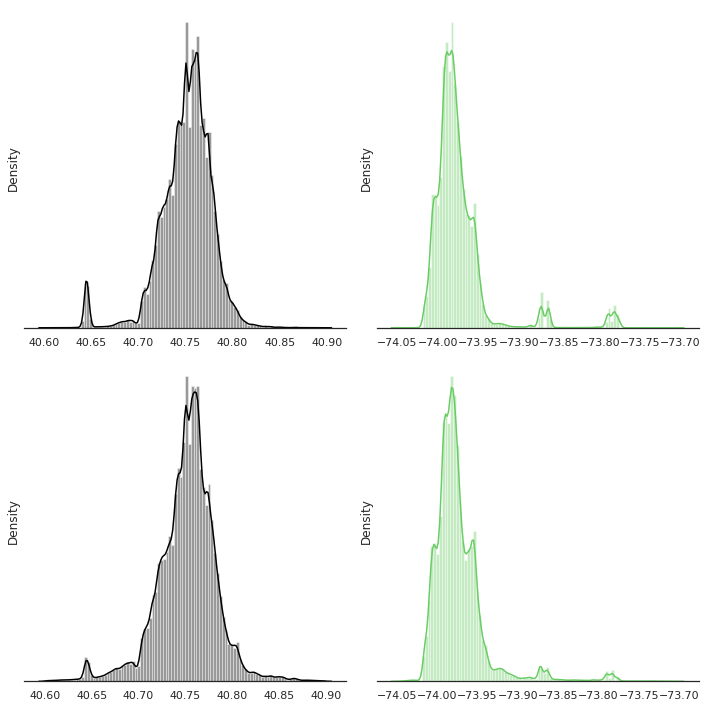

In [123]:
df = df.loc[(df.pickup_latitude > 40.6) & (df.pickup_latitude < 40.9)]
df = df.loc[(df.dropoff_latitude>40.6) & (df.dropoff_latitude < 40.9)]
df = df.loc[(df.dropoff_longitude > -74.05) & (df.dropoff_longitude < -73.7)]
df = df.loc[(df.pickup_longitude > -74.05) & (df.pickup_longitude < -73.7)]
df_data_new = df.copy()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(df_data_new['pickup_latitude'].values, label = 'pickup_latitude',color="black",bins = 100, ax=axes[0,0])
sns.distplot(df_data_new['pickup_longitude'].values, label = 'pickup_longitude',color="g",bins =100, ax=axes[0,1])
sns.distplot(df_data_new['dropoff_latitude'].values, label = 'dropoff_latitude',color="black",bins =100, ax=axes[1, 0])
sns.distplot(df_data_new['dropoff_longitude'].values, label = 'dropoff_longitude',color="g",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()

plt.show()

**Difference between iloc() & loc():**

The loc() function is label based data selecting method which means that we have to pass the name of the row or column which we want to select. This method includes the last element of the range passed in it, unlike iloc(). loc() can accept the boolean data unlike iloc().

The iloc() function is an indexed-based selecting method which means that we have to pass an integer index in the method to select a specific row/column. This method does not include the last element of the range passed in it unlike loc(). iloc() does not accept the boolean data unlike loc().

BIVARIATE ANALYSIS

In [60]:
#df['day_of_week'] = df['pickup_datetime'].dt.weekday
df['day_of_week'] = df['pickup_datetime'].dt.weekday
df['hour_of_day'] = df['pickup_datetime'].dt.hour

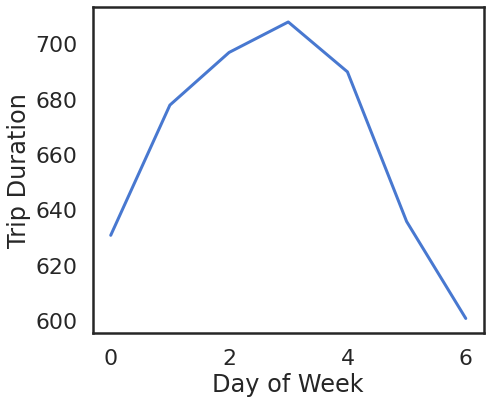

In [114]:
summary_wdays_avg_duration = pd.DataFrame(df.groupby(['day_of_week'])['trip_duration'].median())
summary_wdays_avg_duration.plot(kind = 'line',xlabel = 'Day of Week',ylabel= 'Trip Duration',legend = None,figsize = (7,6) )


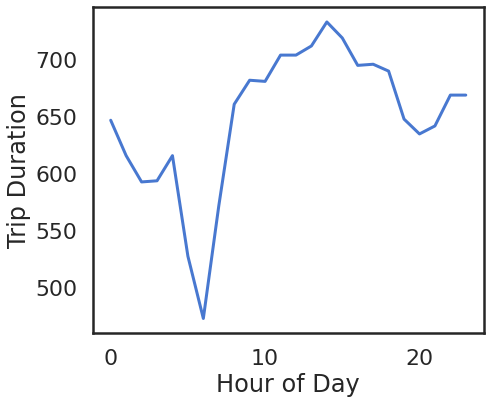

In [113]:
summary_hour_avg_duration = pd.DataFrame(df.groupby(['hour_of_day'])['trip_duration'].median())
summary_hour_avg_duration.plot(kind = 'line',xlabel = 'Hour of Day',ylabel= 'Trip Duration',legend = None, figsize= (7,6) )

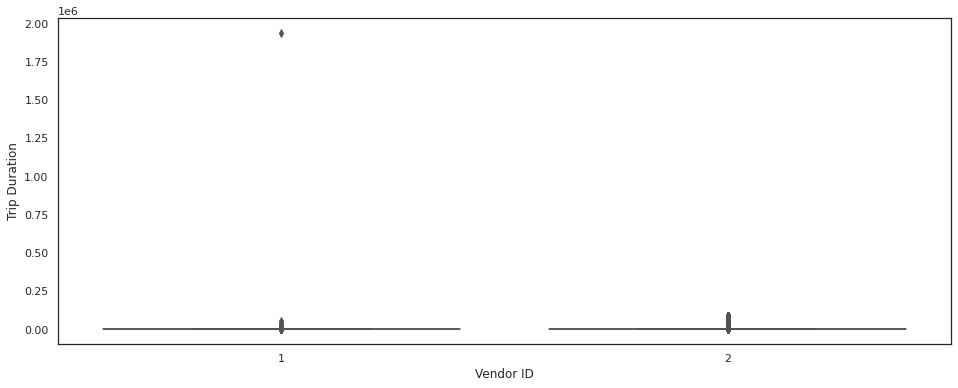

In [124]:
plt.figure(figsize = (16,6))
box_plot=sns.boxplot(x='vendor_id', y = 'trip_duration', data=df)
box_plot.set(xlabel = 'Vendor ID', ylabel= 'Trip Duration')
plt.show()

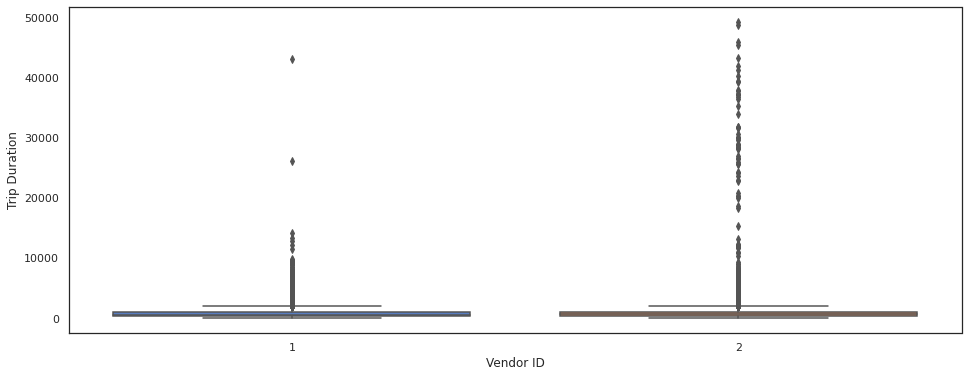

In [125]:
plt.figure(figsize = (16,6))
df_sub = df[df['trip_duration']<50000]
box_plot1=sns.boxplot(x='vendor_id', y = 'trip_duration', data=df_sub)
box_plot1.set(xlabel = 'Vendor ID', ylabel= 'Trip Duration')
plt.show()

Since the median is just around 600 seconds, we observe that vendor 2 has many more outliers as compared to vendor 1.

In [129]:
df.passenger_count.value_counts()

1    515243
2    104576
5     38776
3     29561
6     24035
4     13972
0        31
9         1
Name: passenger_count, dtype: int64

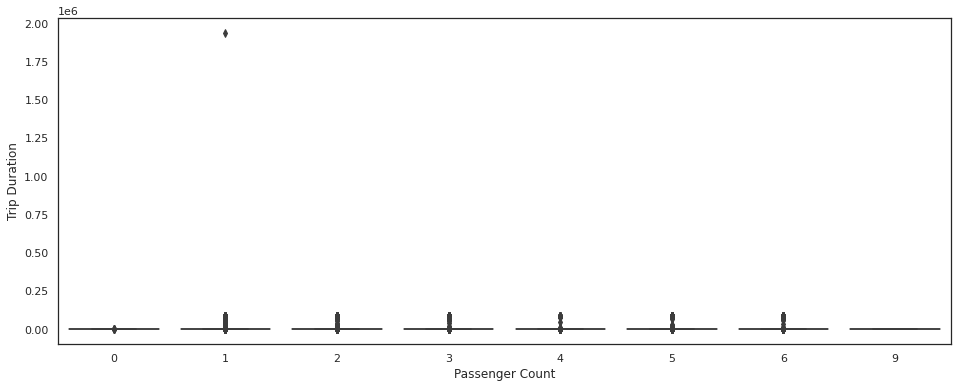

In [139]:
plt.figure(figsize = (16,6))
box_plot2=sns.boxplot(x='passenger_count', y = 'trip_duration', data=df)
box_plot2.set(xlabel = 'Passenger Count', ylabel= 'Trip Duration')
plt.show()

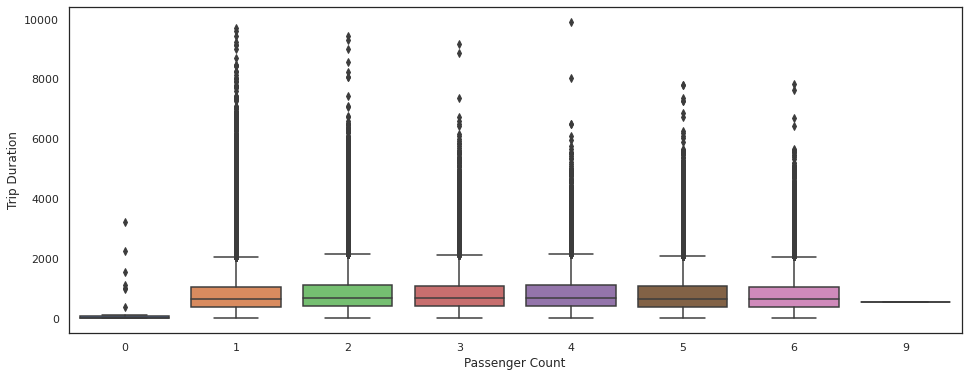

In [140]:

plt.figure(figsize=(16, 6))
df_sub = df[df['trip_duration'] < 10000]
box_plot3=sns.boxplot(x="passenger_count", y="trip_duration", data=df_sub)
box_plot3.set(xlabel = 'Passenger Count', ylabel= 'Trip Duration')
plt.show()

Visualise most frequently occuring Pickup points on the lattitude-longitude Map

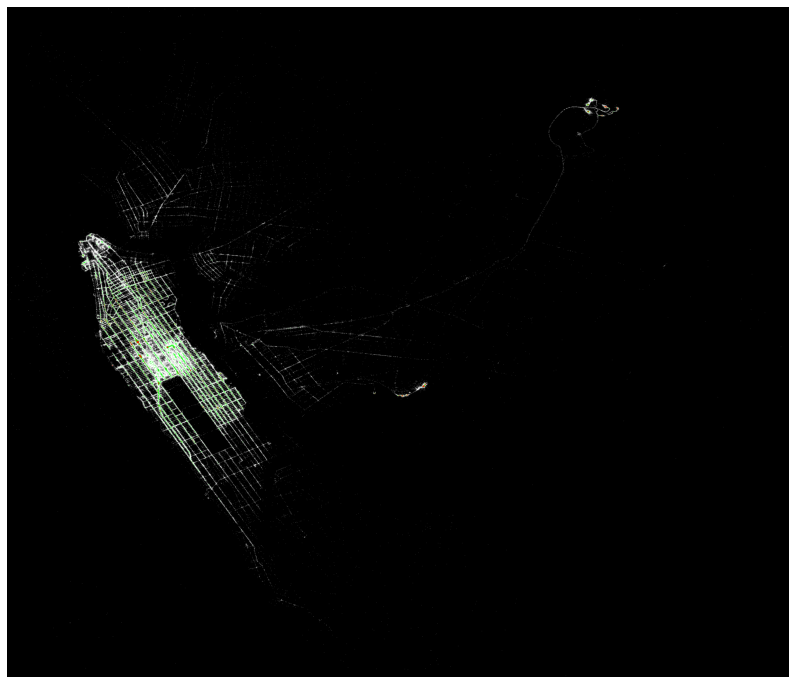

In [141]:
rgb = np.zeros((3000, 3500, 3), dtype=np.uint8)
rgb[..., 0] = 0
rgb[..., 1] = 0
rgb[..., 2] = 0
df_data_new['pick_lat_new'] = list(map(int, (df['pickup_latitude'] - (40.6000))*10000))
df_data_new['drop_lat_new'] = list(map(int, (df['dropoff_latitude'] - (40.6000))*10000))
df_data_new['pick_lon_new'] = list(map(int, (df['pickup_longitude'] - (-74.050))*10000))
df_data_new['drop_lon_new'] = list(map(int,(df['dropoff_longitude'] - (-74.050))*10000))

summary_plot = pd.DataFrame(df_data_new.groupby(['pick_lat_new', 'pick_lon_new'])['id'].count())

summary_plot.reset_index(inplace = True)
summary_plot.head(120)
lat_list = summary_plot['pick_lat_new'].unique()
for i in lat_list:
    lon_list = summary_plot.loc[summary_plot['pick_lat_new']==i]['pick_lon_new'].tolist()
    unit = summary_plot.loc[summary_plot['pick_lat_new']==i]['id'].tolist()
    for j in lon_list:
        a = unit[lon_list.index(j)]
        if (a//25) >0:
            rgb[i][j][0] = 255
            rgb[i,j, 1] = 0
            rgb[i,j, 2] = 0
        elif (a//10)>0:
            rgb[i,j, 0] = 0
            rgb[i,j, 1] = 255
            rgb[i,j, 2] = 0
        else:
            rgb[i,j, 0] = 255
            rgb[i,j, 1] = 255
            rgb[i,j, 2] = 255
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(14,20))
ax.imshow(rgb, cmap = 'hot')
ax.set_axis_off() 

Observations -

* White points - 1-10 trips have white as pickup point
* Green points - 10-25 trips have green as pickup point
* Red points - More than 25 trips have red as pickup point

In [149]:
df.columns

Index(['vendor_id', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'day_of_week', 'hour_of_day'],
      dtype='object')

CORRELATION HEATMAP

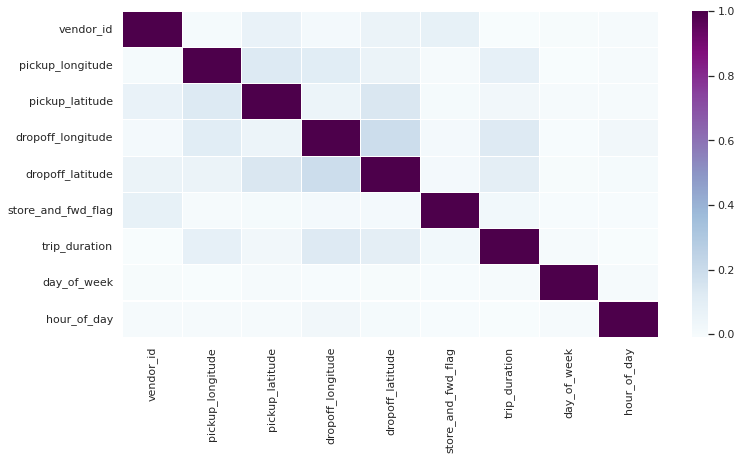

In [152]:
plt.figure(figsize=(12, 6))
#df = df.drop(['id', 'pickup_datetime', 'dropoff_datetime','passenger_count'],axis=1)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="BuPu")